In [1]:
!wget https://istm-4212.s3.us-east-1.amazonaws.com/Iowa_Liquor_Sales_20250416.zip

--2025-04-24 15:59:45--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2025-04-24 15:59:45--  https://istm-4212.s3.us-east-1.amazonaws.com/Iowa_Liquor_Sales_20250416.zip
Resolving istm-4212.s3.us-east-1.amazonaws.com (istm-4212.s3.us-east-1.amazonaws.com)... 52.216.215.10, 54.231.131.58, 52.217.79.8, ...
Connecting to istm-4212.s3.us-east-1.amazonaws.com (istm-4212.s3.us-east-1.amazonaws.com)|52.216.215.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628479067 (599M) [application/zip]
Saving to: ‘Iowa_Liquor_Sales_20250416.zip’

Iowa_Liquor_Sales_2 100%[===================>] 599.36M  60.3MB/s    in 9.7s    

2025-04-24 15:59:55 (61.5 MB/s) - ‘Iowa_Liquor_Sales_20250416.zip’ saved [628479067/628479067]

FINISHED --2025-04-24 15:59:55--
Total wall clock time: 10s
Downloaded: 1 files, 599M in 9.7s (61.5 MB/s)


# **Overview- Ask 1**

This analysis focuses on the Iowa Liquor Dataset. The dataset contains the spirits purchase information of Iowa Class “E” liquor licensees by product and date of purchase from January 1, 2012 to current. Its source is the Iowa Department of Revenue, Alcoholic Beverages. Iowa operates a “control state” model for liquor, meaning the state itself acts as the sole wholesaler of spirits. The Alcoholic Beverages Division buys spirits from liquor manufacturers and vendors, then sells those spirits to licensed retailers (Class “E” liquor stores), and then those liquor stores then sell those bottles to consumers at retail.

It contains 24 total columns:

Invoice/Item Number: Concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order

Date: Date of order

Store Number: Unique number assigned to the store who ordered the liquor.

Store Name: Name of store who ordered the liquor.

Address: Address of store who ordered the liquor.

City: City where the store who ordered the liquor is located

Zip Code: Zip code where the store who ordered the liquor is located

Store Location: Location of store who ordered the liquor. The Address, City, State and Zip Code are geocoded to provide geographic coordinates. Accuracy of geocoding is dependent on how well the address is interpreted and the completeness of the reference data used. Left NULL where unable to provide point location.

County Number: Iowa county number for the county where store who ordered the liquor is located

County: County where the store who ordered the liquor is located

Category: Category code associated with the liquor ordered

Category Name: Category of the liquor ordered.

Vendor Number: The vendor number of the company for the brand of liquor ordered

Vendor Name: The vendor name of the company for the brand of liquor ordered

Item Number: Item number for the individual liquor product ordered.

Item Description: Description of the individual liquor product ordered.

Pack: The number of bottles in a case for the liquor ordered

Bottle Volume (ml): Volume of each liquor bottle ordered in milliliters.

State Bottle Cost: The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered

State Bottle Retail: The amount the store paid for each bottle of liquor ordered

Bottles Sold: The number of bottles of liquor ordered by the store

Sale (Dollars): Total cost of liquor order (number of bottles multiplied by the state bottle retail)

Volume Sold (Liters): Total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)

Volume Sold (Gallons): Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)

This dataset is important to liquor companies because it allows them to understand general trends in liquor sales. While it doesn't directly track consumer drinking behavior, the amount that stores buy can be a transitive substitute for that measure. Liquor stores will buy only what they know consumers will want, so this dataset is particularly useful for liquor company advertising. This dataset tracks what, when, where, and how much liquor is sold, which helps liquor advertisers target promotions more effectively. Additionally, the dataset is useful for the Alcoholic Beverages Division itself, since it tracks the cost of liquor purchased wholesale by the state, and can mitigate its own costs by understanding liquor store purchasing behavior.

# Getting the iowa data by using shell commands

In [ ]:
!wget https://istm-4212.s3.us-east-1.amazonaws.com/Iowa_Liquor_Sales_20250416.zip

# Unzipping the zip file with the data 

In [2]:
!unzip Iowa_Liquor_Sales_20250416.zip

Archive:  Iowa_Liquor_Sales_20250416.zip
  inflating: Iowa_Liquor_Sales_20250416.csv  


# Using the head command to see whats inside the csv 

In [5]:
!head Iowa_Liquor_Sales_20250416.csv

Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
INV-24306300051,01/02/2020,5257,MAD AVE QUIK SHOP,"405, MADISON AVE",OTTUMWA,52501,,90,WAPELLO,1031100,AMERICAN VODKAS,434,LUXCO INC,36307,HAWKEYE VODKA,12,1000,4.05,6.08,12,72.96,12.00,3.17
INV-24290800074,01/02/2020,2500,HY-VEE FOOD STORE #1 / AMES,3800 W LINCOLN WAY,AMES,50010,,85,STORY,1031100,AMERICAN VODKAS,402,OZ SPIRITS LLC,36447,INGENIOZ,12,750,12.54,18.81,12,225.72,9.00,2.37
INV-24290800023,01/02/2020,2500,HY-VEE FOOD STORE #1 / AMES,3800 W LINCOLN WAY,AMES,50010,,85,STORY,1012400,IRISH WHISKIES,370,PERNOD RICARD USA,15677,POWERS IRISH WHISKEY,12,1000,16.49,24.74,2,49.48,2.00,0.52
INV-24306100084,01/02/2020,2555,HY-VEE FOOD STORE / KEOKUK,3111 MAIN,KEOKUK,52632,PO

# Using the CSV stat for the first 100000 just to see what we're doing 

In [1]:
!head -n 100000 Iowa_Liquor_Sales_20250416.csv | csvstat

  1. "Invoice/Item Number"

	Type of data:          Text
	Contains null values:  False
	Non-null values:       99999
	Unique values:         99999
	Longest value:         15 characters
	Most common values:    INV-24306300051 (1x)
	                       INV-24290800074 (1x)
	                       INV-24290800023 (1x)
	                       INV-24306100084 (1x)
	                       INV-24313900004 (1x)

  2. "Date"

	Type of data:          Date
	Contains null values:  False
	Non-null values:       99999
	Unique values:         12
	Smallest value:        2020-01-02
	Largest value:         2020-01-17
	Most common values:    2020-01-03 (13968x)
	                       2020-01-07 (10239x)
	                       2020-01-06 (9583x)
	                       2020-01-02 (9439x)
	                       2020-01-10 (8858x)

  3. "Store Number"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       99999
	Unique values:         1369
	Smallest value:        2106
	L

# Creating the sql data base and connecting it

In [5]:
!createdb -U student edassignment_final

createdb: error: database creation failed: ERROR:  database "edassignment_final" already exists


In [1]:
%load_ext sql

/home/ubuntu/.python3-venv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%sql postgresql://student@/edassignment_final

Connecting to 'postgresql://student@/edassignment_final'

In [5]:
%config SqlMagic.displaylimit = 40
##Limit SQL output in notebook to  40 rows

# We are creating the table to hold all of the 13 million invoices so then we can split it into our own dimensions

In [15]:
%%sql 
create table iowa_data( --- creating the basic table for all the data pulled from the iowa data set
    invoice_line_no Text,
    date Date,
    store Text,
    name Text,
    address Text,
    city Text,
    zipcode Text,
    store_location Text,
    county_number Text, 
    county Text, 
    category Text, 
    category_name Text, 
    vendor_no Text,
    vendor_name Text, 
    itemno Text,
    im_desc Text,
    pack Numeric,
    bottle_volume_ml Numeric,
    state_bottle_cost Numeric,
    state_bottle_retail Numeric,
    sale_bottles Numeric,
    sale_dollars Numeric,
    sale_liters Numeric,
    sale_gallons Numeric
    

);


Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

# We copy the csv with all of the 13 million invoices into the iowa_data in SQL

In [21]:
%%sql  
copy iowa_data from '/home/ubuntu/Iowa_Liquor_Sales_20250416.csv'
Header --- adding the header option as the data set from the !head query showed it started with a header line
csv;

Running query in 'postgresql://student@/edassignment_final'

13604168 rows affected.

++
||
++
++

# We verify to make sure the structure of the table was correctly imputed

In [22]:
%%sql
select * from iowa_data --- verifying whats insidethe iowa_data table
limit 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,category,category_name,vendor_no,vendor_name,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
INV-24306300051,2020-01-02,5257,MAD AVE QUIK SHOP,"405, MADISON AVE",OTTUMWA,52501,None,90,WAPELLO,1031100,AMERICAN VODKAS,434,LUXCO INC,36307,HAWKEYE VODKA,12,1000,4.05,6.08,12,72.96,12.00,3.17
INV-24290800074,2020-01-02,2500,HY-VEE FOOD STORE #1 / AMES,3800 W LINCOLN WAY,AMES,50010,None,85,STORY,1031100,AMERICAN VODKAS,402,OZ SPIRITS LLC,36447,INGENIOZ,12,750,12.54,18.81,12,225.72,9.00,2.37
INV-24290800023,2020-01-02,2500,HY-VEE FOOD STORE #1 / AMES,3800 W LINCOLN WAY,AMES,50010,None,85,STORY,1012400,IRISH WHISKIES,370,PERNOD RICARD USA,15677,POWERS IRISH WHISKEY,12,1000,16.49,24.74,2,49.48,2.00,0.52
INV-24306100084,2020-01-02,2555,HY-VEE FOOD STORE / KEOKUK,3111 MAIN,KEOKUK,52632,POINT (-91.403752 40.41538),56,LEE,1062300,AGED DARK RUM,065,JIM BEAM BRANDS,44426,CRUZAN 151,12,750,14.00,21.00,2,42.00,1.50,0.39
INV-24313900004,2020-01-02,5135,FAREWAY STORES #155 / HUXLEY,911 HWY 69,HUXLEY,50124,None,85,STORY,1011100,BLENDED WHISKIES,260,DIAGEO AMERICAS,25608,SEAGRAMS 7 CROWN,6,1750,12.96,19.44,12,233.28,21.00,5.54
INV-24295700041,2020-01-02,5636,BIG DISCOUNT LIQUOR,5427 CENTER POINT RD,CEDAR RAPIDS,52402,None,57,LINN,1031100,AMERICAN VODKAS,205,E & J GALLO WINERY,36971,NEW AMSTERDAM 80PRF,6,1750,14.00,21.00,1,21.00,1.75,0.46
INV-24312700027,2020-01-02,5465,KUM & GO #1215 / AMES,4506 LINCOLN WAY,AMES,50010,None,85,STORY,1011200,STRAIGHT BOURBON WHISKIES,065,JIM BEAM BRANDS,19066,JIM BEAM,12,750,10.50,15.75,4,63.00,3.00,0.79
INV-24296900123,2020-01-02,2625,HY-VEE WINE & SPIRITS #2 / DAVENPORT,3301 W KIMBERLY RD,DAVENPORT,52804,None,82,SCOTT,1081200,CREAM LIQUEURS,305,MHW LTD,73054,RUMCHATA,6,1750,25.00,37.50,3,112.50,5.25,1.38
INV-24292600050,2020-01-02,4404,KUM & GO #292 / ANKENY,1825 N ANKENY BLVD,ANKENY,50021,None,77,POLK,1031100,AMERICAN VODKAS,434,LUXCO INC,36304,HAWKEYE VODKA,24,375,1.86,2.79,7,19.53,2.62,0.69
INV-24293600045,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311,None,77,POLK,1032100,IMPORTED VODKAS,260,DIAGEO AMERICAS,36871,CIROC 80PRF,12,750,16.49,24.74,1,24.74,0.75,0.19


## Objective: Describe the analytical questions you want to answer with the data. 4+ major questions are required

The business questions that we will be analyzing using this data are listed below along with their business value.

What are the top 10 products and categories for the year 2024? (Top-Performing Products & Categories): This question will help us optimize advertising spendings by focusing ad campaigns on 2024's top performing products and categories. Class E retailors can maximize their return on investments using the findings from this question. These retailors can also use the findings to align their inventory levels with demand reducing inventory costs and stockouts.
What are the top 3 performing liquor categories by days of the week? (Best Performing Day of the Week): Finding which categories perform the best on each day of the week will allow the retailors to run daily targeted promotions (similar to taco tuesdays) to maximize profits. They can also schedule their ads better, such as promoting high-performing categories online or on social media a day before their sale spike to maximize profits using these findings.
What are the top 10 category-county combinations by sale? (Sales Performance by County and City): This business question will allow the Alcoholic Beverages Divison and retailors to tailor their advertising campaigns by locations since we will be able to see which liquor categories dominate in specific counties. For example if whiskey performs well a specific county, ad promotions can focus on promoting premium whiskey in that county.
Which are the top performing stores by product and date? (Top-Performing Stores by Date and Products): By analyzing which stores consistently lead sales for specific products on a specific date, The Alcoholic Beverage Division can target these stores (or their locations) for brand activations, exclusive promotions, or loyalty campaigns. These stores are important leverage points for increasing the visibility of products. Another business values for this question will be identifying patterns linking products to dates that are tied to major events like holidays or seasonal shifts. This will help guide timely advertising and inventory stocking resulting in operational efficiency.

## Objective: Describe any concerns with the data and changes you expect to overcome

Some of the concerns with the data that we expect to overcome are handling missing values, duplicates, inconsistent formatting, working with a large dataset in general.

Missing values: some attributes may lack key information like store names, sales data, etc. To overcome this we will drop or impute the missing values depending on their importance level.
Duplicates: some roes may have the same information, such as duplicate transcation numbers. We will unique identifiers to determine if there are duplicates and drop the duplicates.
Inconsistent formatiing: some data types such as dates may have inconsistent formatting. We will format the columns (depending on the column) in a similar fashion to avoid errors or inaccurate results.
large dataset: It will be difficult to deal with 13 million rows while loading and inserting records into tables. We can use batches to upload the data into a table to avoid long wait times.

# **Data Wrangling and Filtering- Ask 2**

## Duplicates- Duplicates will only matter for invoice numbers, as that is a specific transaction that happens and we only want one instance of a transaction, if any duplicate invoice numbers are found we will drop them

## Looking for any duplicates in invoices to make sure it isnt repeating redudant information

In [38]:
%%sql
SELECT 
    sale_dollars, 
    COUNT(*) AS count,
    invoice_line_no
FROM iowa_data
GROUP BY sale_dollars, invoice_line_no
HAVING COUNT(*) > 1;


Running query in 'postgresql://student@/edassignment_final'

sale_dollars,count,invoice_line_no


## No Duplicates were found for invoice

## Null values will matter depending on where they are. Some null values in terms of location will be okay, we will insert some default values later on 

## Looking for any stores that dont have a city connected with it

In [5]:
%%sql
select * 
from iowa_data
where city is null

Running query in 'postgresql://student@/edassignment_final'

3928 rows affected.

invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,category,category_name,vendor_no,vendor_name,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
INV-25585100016,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1011100,BLENDED WHISKIES,065,JIM BEAM BRANDS,27544,RED STAG BLACK CHERRY,12,750,10.50,15.75,4,63.00,3.00,0.79
INV-25585100024,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1011400,TENNESSEE WHISKIES,085,BROWN FORMAN CORP.,26826,JACK DANIELS OLD #7 BLACK LABEL,12,750,15.57,23.36,3,70.08,2.25,0.59
INV-25585100017,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,67266,YUKON JACK,12,750,9.25,13.88,2,27.76,1.50,0.39
INV-25585100009,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1062100,GOLD RUM,434,LUXCO INC,45246,PARAMOUNT GOLD RUM,12,750,4.00,6.00,2,12.00,1.50,0.39
INV-25585100041,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,64867,FIREBALL CINNAMON WHISKEY,12,1000,11.34,17.01,2,34.02,2.00,0.52
INV-25585100008,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1062500,FLAVORED RUM,370,PERNOD RICARD USA,42716,MALIBU COCONUT RUM,12,750,7.49,11.24,4,44.96,3.00,0.79
INV-25585100015,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1011100,BLENDED WHISKIES,260,DIAGEO AMERICAS,25606,SEAGRAMS 7 CROWN,12,750,7.50,11.25,4,45.00,3.00,0.79
INV-25585100031,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1081200,CREAM LIQUEURS,260,DIAGEO AMERICAS,68036,BAILEYS ORIGINAL IRISH CREAM,12,750,16.49,24.74,3,74.22,2.25,0.59
INV-25585100003,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1031100,AMERICAN VODKAS,055,SAZERAC NORTH AMERICA,37937,SKOL VODKA,12,1000,4.42,6.63,12,79.56,12.00,3.17
INV-25585100028,2020-03-03,3808,THRIFTWAY,None,None,None,None,None,None,1012100,CANADIAN WHISKIES,259,HEAVEN HILL BRANDS,11774,BLACK VELVET,24,375,3.07,4.61,2,9.22,0.75,0.19


## There are some null cities that were found

## Looking for any invoices with empty sales data

In [6]:
%%sql 
select sale_dollars, name
from iowa_data
where sale_dollars is null
limit 10

Running query in 'postgresql://student@/edassignment_final'

sale_dollars,name


## No sales transactions were found null

## Looking for any category or im_desc that are empty

In [69]:
%%sql 
select * from iowa_data
where category is null
limit 15

Running query in 'postgresql://student@/edassignment_final'

15 rows affected.

invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,category,category_name,vendor_no,vendor_name,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
INV-25601500001,2020-03-03,5526,RANDALL'S STOP N SHOP,320 5TH ST,HUDSON,50643,POINT (-92.45494 42.406565),07,BLACK HAWK,None,None,434,LUXCO INC,941836,EVERCLEAR 190PRF,12,750,10.84,16.26,60,975.60,45.00,11.88
INV-25613200043,2020-03-04,5906,POLK CITY LIQUOR,201 N 3RD ST STE A AND B,POLK CITY,50226,None,77,POLK,None,None,085,BROWN FORMAN CORP.,920376,SOOH OLD FORESTER 1920,6,750,29.98,44.97,1,44.97,0.75,0.19
INV-25638400024,2020-03-04,3525,WINES AND SPIRITS,106 W 2ND ST,WASHINGTON,52353,POINT (-91.692214 41.300399),92,WASHINGTON,None,None,085,BROWN FORMAN CORP.,920376,SOOH OLD FORESTER 1920,6,750,29.98,44.97,6,269.82,4.50,1.18
INV-25613600004,2020-03-04,2502,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,None,77,POLK,None,None,085,BROWN FORMAN CORP.,920376,SOOH OLD FORESTER 1920,6,750,29.98,44.97,6,269.82,4.50,1.18
INV-25687700001,2020-03-06,2549,HY-VEE FOOD STORE / INDIANOLA,910 N JEFFERSON,INDIANOLA,50125,None,91,WARREN,None,None,477,VINO COM LLC,942330,RON ABUELO ANEJO 7YR,12,750,17.84,26.76,12,321.12,9.00,2.37
INV-25737100012,2020-03-09,5198,RIVERSIDE LIQUOR,826 E RIVER DR,DAVENPORT,52803,POINT (-90.561741 41.524926),82,SCOTT,None,None,395,PROXIMO,988849,SOOH JOSE CUERVO ESPECIAL GOLD FLASK,48,100,1.50,2.25,48,108.00,4.80,1.26
INV-25726600126,2020-03-09,3612,B AND C LIQUOR / MAQUOKETA,509 E PLATT,MAQUOKETA,52060,POINT (-90.659692 42.06922000000001),49,JACKSON,None,None,395,PROXIMO,988849,SOOH JOSE CUERVO ESPECIAL GOLD FLASK,48,100,1.50,2.25,4,9.00,0.40,0.10
INV-25713900118,2020-03-09,2593,HY-VEE FOOD STORE / CARROLL,905 US HIGHWAY 30 WEST,CARROLL,51401,POINT (-94.853591 42.064155),14,CARROLL,None,None,305,MHW LTD,80024,BLUE CHAIR BAY BANANA RUM CREAM,12,750,9.42,14.13,2,28.26,1.50,0.39
INV-25700100039,2020-03-09,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,POLK,None,None,305,MHW LTD,80024,BLUE CHAIR BAY BANANA RUM CREAM,12,750,9.42,14.13,2,28.26,1.50,0.39
INV-25700100048,2020-03-09,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,POLK,None,None,395,PROXIMO,988849,SOOH JOSE CUERVO ESPECIAL GOLD FLASK,48,100,1.50,2.25,48,108.00,4.80,1.26


## Some categories were found null

In [17]:
%%sql
select distinct(im_desc) from iowa_data 
where category is null

Running query in 'postgresql://student@/edassignment_final'

46 rows affected.

im_desc
99 PINEAPPLE MINI
99 WATERMELON MINI
ATHENA OUZO RUM
BAINS CAPE MOUNTAIN WHISKEY
BASTILLE 1789
BIG PEACH LIQUEUR
BLACK SADDLE BOURBON
BLUE CHAIR BAY BANANA RUM CREAM
BRUGAL 1888 GRAN RESERVA
BURNETTS CHERRY LIMEADE


In [24]:
%%sql
select * from iowa_data
where vendor_name is null

Running query in 'postgresql://student@/edassignment_final'

4 rows affected.

invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,category,category_name,vendor_no,vendor_name,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons
INV-35139200005,2021-03-18,5251,NORTHSIDE LIQUOR,1303 NORTH FEDERAL,MASON CITY,50401,POINT (-93.201061 43.163663),17,CERRO GORDO,1032100,IMPORTED VODKAS,None,None,965108,GREY GOOSE VX,6,1000,31.34,80.00,18,1440.00,18.00,4.75
INV-35973800003,2021-04-20,6035,BOOTLEGGING BARZINIS,412 FIRST AVE,CORALVILLE,52241,POINT (-91.565517 41.672672),52,JOHNSON,1012400,IRISH WHISKIES,None,None,915574,CONNEMARA 12YR,6,750,30.84,56.25,6,337.50,4.50,1.18
INV-33728600005,2021-01-25,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77,POLK,1022200,100% AGAVE TEQUILA,None,None,988100,MONTE ALBAN SILVER,12,750,12.98,15.56,12,186.72,9.00,2.37
INV-33740700003,2021-01-25,3773,BENZ DISTRIBUTING,501 7TH AVE SE,CEDAR RAPIDS,52401,POINT (-91.659875 41.97574),57,LINN,1012400,IRISH WHISKIES,None,None,915574,CONNEMARA 12 YEAR,6,750,14.66,56.25,6,337.50,4.50,1.18


In [25]:
%%sql
select * from iowa_data
where im_desc is null

Running query in 'postgresql://student@/edassignment_final'

invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,category,category_name,vendor_no,vendor_name,itemno,im_desc,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons


## Looking to see if there are any null values in the date column

In [13]:
%%sql 
select distinct(date)
from iowa_data
where date is null 
limit 10

Running query in 'postgresql://student@/edassignment_final'

date


# Making the Product, Store, Date, Sales Tables

## Making a products table 

In [6]:
%%sql
drop table if exists product_table cascade; -- dropping table if it exsists
CREATE TABLE product_table ( --- we get all of the columns connected to the actual product into the table
    product_key SERIAL PRIMARY KEY, -- adding the product key to connect with sales facts data
    itemno TEXT,
    im_desc TEXT,
    category TEXT,
    category_name TEXT,
    vendor_no TEXT,
    vendor_name TEXT
);


Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

## Setting any new values that are null into our default 'Unknown'

### Setting default values for all of the nulls to ensure that we are not losing any important sales fact data, overcoming the challenge of lost data due to nulls. Not adding defaults for date and sales data because they do not have any nulls in them

In [5]:
%%sql
Alter Table product_table -- altering columns to unkown because we know some of them exists but rows still have valuable information we can use so we wont drop
Alter column category_name SET DEFAULT 'Unknown',
Alter column category set default 'Unknown',
Alter column vendor_no set default 'Unknown',
Alter column vendor_name set default 'Unknown'

Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

## Making our exsisting null values into our default 'Unknown'

In [8]:
%%sql
UPDATE product_table -- updating any values that are null
SET
    itemno = COALESCE(itemno, 'Unknown'),
    im_desc = COALESCE(im_desc, 'Unknown'),
    category = COALESCE(category, 'Unknown'),
    category_name = COALESCE(category_name, 'Unknown'),
    vendor_no = COALESCE(vendor_no, 'Unknown'),
    vendor_name = COALESCE(vendor_name, 'Unknown');


Running query in 'postgresql://student@/edassignment_final'

12348 rows affected.

++
||
++
++

In [26]:
%%sql 
select * from product_table --- verifying the table was created the way we intended to 

Running query in 'postgresql://student@/edassignment_final'

product_key,itemno,im_desc,category,category_name,vendor_no,vendor_name


## Making a store table

In [8]:
%%sql
drop table if exists store_table cascade; -- dropping table if exsists
CREATE TABLE store_table ( -- adding all columns that pretain to the store 
    store_key SERIAL PRIMARY KEY, --- we are adding the store key as the primary key to connect with sales data later and make queries make sense and be faster
    store_number Text,      -- from original `store` column
    name TEXT,
    address TEXT,
    city TEXT,
    zipcode TEXT,
    county TEXT,
    county_number TEXT,
    store_location TEXT
);

Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

## Setting any new values that are null into our default 'Unknown'

In [14]:
%%sql
ALTER TABLE store_table -- setting any new values that are null that are inserted to unknown in store table
ALTER COLUMN store_number SET DEFAULT 'Unknown',
ALTER COLUMN name SET DEFAULT 'Unknown',
ALTER COLUMN address SET DEFAULT 'Unknown',
ALTER COLUMN city SET DEFAULT 'Unknown',
ALTER COLUMN zipcode SET DEFAULT 'Unknown',
ALTER COLUMN county SET DEFAULT 'Unknown',
ALTER COLUMN county_number SET DEFAULT 'Unknown',
ALTER COLUMN store_location SET DEFAULT 'Unknown';


Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

## Making our exsisting null values into our default 'Unknown'

In [15]:
%%sql
UPDATE store_table
SET
    store_number = COALESCE(store_number, 'Unknown'),
    name = COALESCE(name, 'Unknown'),
    address = COALESCE(address, 'Unknown'),
    city = COALESCE(city, 'Unknown'),
    zipcode = COALESCE(zipcode, 'Unknown'),
    county = COALESCE(county, 'Unknown'),
    county_number = COALESCE(county_number, 'Unknown'),
    store_location = COALESCE(store_location, 'Unknown');


Running query in 'postgresql://student@/edassignment_final'

28282 rows affected.

++
||
++
++

In [9]:
%%sql 
select * from store_table --- verifying the table was created in the way intended to 
limit 10

Running query in 'postgresql://student@/edassignment_final'

store_key,store_number,name,address,city,zipcode,county,county_number,store_location


## Creating a date table

In [3]:
%%sql
DROP TABLE IF EXISTS date_table CASCADE;

CREATE TABLE date_table ( ---  we added all the columns that was related to date, however we split up the date into day, month, year, and day of the week so we can do better data exploration
    date_key INT PRIMARY KEY,         -- Format: YYYYMMDD
    full_date DATE,                   -- Original full date
    day TEXT,
    month TEXT,
    year TEXT,
    day_of_the_week TEXT
);


UsageError: Cell magic `%%sql` not found.


In [11]:
%%sql 
select * from date_table ---verifying the date table was created the way we intended
limit 10

Running query in 'postgresql://student@/edassignment_final'

date_key,full_date,day,month,year,day_of_the_week


## None of the invoices had null dates so we don't assign default values as they are not needed in this case

# Creating the facts sales_table

In [13]:
%%sql
drop table if exists sales_table cascade; 
CREATE TABLE sales_table (  ---- sales facts table is everything sales related
    sale_id SERIAL PRIMARY KEY, -- we made a sale_id as the primary key which will give a key to each invoice
    date_key INT NOT NULL,  -- adding the date key to connect with date table
    product_key INT NOT NULL, --- adding the product key to connect with product table
    store_key INT NOT NULL,  --- adding the store key to connect with store table
    
    sale_dollars NUMERIC,
    sale_bottles NUMERIC,
    sale_liter NUMERIC,
    sale_gallons NUMERIC,
    state_bottle_cost NUMERIC,
    state_bottle_retail NUMERIC,
    bottle_volume_ml NUMERIC,
    pack NUMERIC,

    -- Foreign Key Constraints
    FOREIGN KEY (date_key) REFERENCES date_table(date_key),   --- reference the primary key of the date table
    FOREIGN KEY (product_key) REFERENCES product_table(product_key), ---  reference the primary key of the product table
    FOREIGN KEY (store_key) REFERENCES store_table(store_key) --- reference the primary key of the store table
);

Running query in 'postgresql://student@/edassignment_final'

++
||
++
++

In [14]:
%%sql
select * from sales_table -- verifying the ttable was creatted the way we wanted 
limit 10

Running query in 'postgresql://student@/edassignment_final'

sale_id,date_key,product_key,store_key,sale_dollars,sale_bottles,sale_liter,sale_gallons,state_bottle_cost,state_bottle_retail,bottle_volume_ml,pack


# Inserting the values into the dimensions for sales, date, product, and store tables

## Inserting for date table

In [15]:
%%sql
INSERT INTO date_table (date_key, full_date, day, month, year, day_of_the_week)
SELECT DISTINCT
  TO_CHAR(TO_DATE(date::TEXT, 'YYYY-MM-DD'), 'YYYYMMDD')::INT,  --- making this the date key for the date table
  TO_DATE(date::TEXT, 'YYYY-MM-DD'), -- this will provide the full_date in the format we want 
  TO_CHAR(TO_DATE(date::TEXT, 'YYYY-MM-DD'), 'DD'), --- pulling out the specific day from the date 
  TO_CHAR(TO_DATE(date::TEXT, 'YYYY-MM-DD'), 'MM'),  --- pulling the specific month from the date
  TO_CHAR(TO_DATE(date::TEXT, 'YYYY-MM-DD'), 'YYYY'), --- pulling the specific year from the date 
  TO_CHAR(TO_DATE(date::TEXT, 'YYYY-MM-DD'), 'FMDay') --- pulling the day of the week from the date 
FROM iowa_data
WHERE date IS NOT NULL
ON CONFLICT (date_key) DO NOTHING;

Running query in 'postgresql://student@/edassignment_final'

1554 rows affected.

++
||
++
++

In [16]:
%%sql 
select * from date_table -- verifying the values were put in right
limit 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

date_key,full_date,day,month,year,day_of_the_week
20240511,2024-05-11,11,05,2024,Saturday
20220414,2022-04-14,14,04,2022,Thursday
20241227,2024-12-27,27,12,2024,Friday
20230124,2023-01-24,24,01,2023,Tuesday
20231209,2023-12-09,09,12,2023,Saturday
20201218,2020-12-18,18,12,2020,Friday
20230324,2023-03-24,24,03,2023,Friday
20211125,2021-11-25,25,11,2021,Thursday
20231020,2023-10-20,20,10,2023,Friday
20250314,2025-03-14,14,03,2025,Friday


## Inserting values into store table

In [18]:
%%sql
-- For store_table
INSERT INTO store_table (store_number, name, address, city, zipcode, county, county_number, store_location) -- specifying the order and what columns to insert values into
SELECT DISTINCT store, name, address, city, zipcode, county, county_number, store_location -- dont want to have any duplicated and can mess up the facts table later on
FROM iowa_data
WHERE store IS NOT NULL; -- making sure the store is not null so we get those stores needed for the table


Running query in 'postgresql://student@/edassignment_final'

14141 rows affected.

++
||
++
++

In [19]:
%%sql 
select * from store_table -- verifying the values that were inputed
limit 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

store_key,store_number,name,address,city,zipcode,county,county_number,store_location
1,5923,CASEY'S GENERAL STORE #2694 / PELLA,2421 WASHINGTON ST,PELLA,50219,MARION,None,POINT (-92.95096698799995 41.40976099400007)
2,5879,HOMETOWN FOODS - CONRAD,119 N MAIN ST,CONRAD,50621,GUTHRIE,39,POINT (-92.874589 42.225148)
3,5270,CASEY'S GENERAL STORE # 2783/ URBAND,4901 86TH ST,URBANDALE,50322,POLK,None,POINT (-93.73537147099995 41.65023062900008)
4,010098,THE PUMPER / FAYETTE,515 W. WATER STREET,FAYETTE,52142,FAYETTE,None,POINT (-91.80878 42.84444)
5,5575,CASEY'S GENERAL STORE #2919 / MARION,340 MARION BLVD,MARION,52302,LINN,None,POINT (-91.61357 42.03003)
6,6224,MID TOWN LIQUOR & VAPE / MASON CITY,824 NORTH FEDERAL AVENUE,MASON CITY,50401,CERRO GORDO,None,POINT (-93.20147701199994 43.15972401000005)
7,4300,FAREWAY STORES #625 / OSKALOOSA,311 3RD AVE W,OSKALOOSA,52577,MAHASKA,None,POINT (-92.64806 41.2926)
8,5301,YESWAY STORE # 10012/ OTTUMWA,2508 COURT ST N,OTTUMWA,52501,WAPELLO,90,POINT (-92.409169 41.051858)
9,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,3625 EDGEWOOD RD SW,CEDAR RAPIDS,52404,LINN,None,POINT (-91.71598 41.94232)
10,5279,CASEY'S GENERAL STORE # 2560/ AMES,3020 DUFF AVE,AMES,50010,STORY,None,POINT (-93.618171603 42.051246522)


## Inserting into Product Table

In [20]:
%%sql
-- For product_table
INSERT INTO product_table (itemno, im_desc, category, category_name, vendor_no, vendor_name) --- choosing the order and columns we are inserting the values into 
SELECT DISTINCT itemno, im_desc, category, category_name, vendor_no, vendor_name --- from our created product table we want it to be distinct as the sales fact data has the information we need and it wont create duplicates
FROM iowa_data
WHERE itemno IS NOT NULL; -- making sure we dont pull null values on this column

Running query in 'postgresql://student@/edassignment_final'

12348 rows affected.

++
||
++
++

In [17]:
%%sql 
select * from product_table -- verifying the values inputed into the product table
limit 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

product_key,itemno,im_desc,category,category_name,vendor_no,vendor_name
238,37061,BROKEN SHED VODKA,1032100,IMPORTED VODKAS,305,MHW LTD
1689,976642,HAYMANS SLOE GIN,Unknown,Unknown,305,MHW LTD
2564,903529,NUVO LIQUEUR,1901200,SPECIAL ORDER ITEMS,305,MHW LTD
1,67526,KAHLUA COFFEE,1081100,COFFEE LIQUEURS,370,PERNOD RICARD USA
953,987953,KAVALAN EX-BOURBON,1012200,SCOTCH WHISKIES,391,HOTALING & CO
1084,4989,GLENFARCLAS 10YR,1012200,SCOTCH WHISKIES,330,GEMINI SPIRITS
3570,942330,RON ABUELO ANEJO 7YR,1062100,GOLD RUM,477,VINO COM LLC
4221,27723,JIM BEAM HONEY,1011100,BLENDED WHISKIES,065,JIM BEAM BRANDS
5719,34546,PEARL,1032100,IMPORTED VODKAS,434,LUXCO INC
5874,37105,TOM OF FINLAND,1032100,IMPORTED VODKAS,305,MHW LTD


## Inserting into Sales Table

### We had help from Stack Overflow site to help find a way to get all 13 million rows into the sales facts table. We had help with the batch portion of the code and the index portion 

In [ ]:
%%sql
--creating index to make the sales table faster for inserting values
CREATE INDEX idx_itemno ON iowa_data(itemno); -- creating an index for column itemno
CREATE INDEX idx_vendor_no ON iowa_data(vendor_no);-- creating an index for vendor_no
CREATE INDEX idx_store ON iowa_data(store); -- creating an index for the store column
CREATE INDEX idx_date ON iowa_data(date); --- creating an index for data column


## First Batch to try to get to 13 million

In [9]:
%%sql
INSERT INTO sales_table (  -- specifying where to send values to and what order
    date_key,
    product_key,
    store_key,
    sale_dollars,
    sale_bottles,
    sale_liter,
    sale_gallons,
    state_bottle_cost,
    state_bottle_retail,
    bottle_volume_ml,
    pack
)
SELECT  --- selecting from where to get the values to insert into the the empty values
    d.date_key,
    p.product_key,
    s.store_key,
    i.sale_dollars,
    i.sale_bottles,
    i.sale_liters,
    i.sale_gallons,
    i.state_bottle_cost,
    i.state_bottle_retail,
    i.bottle_volume_ml,
    i.pack
FROM (
    SELECT * ---- we are doing a query to not get null for the specified columns which were indexed
    FROM iowa_data
    WHERE
      itemno IS NOT NULL
      AND vendor_no IS NOT NULL
      AND im_desc IS NOT NULL
      AND category IS NOT NULL
      AND store IS NOT NULL
      AND date IS NOT NULL
    ORDER BY invoice_line_no --- ordering by invoice line number so it doesnt go over an already given invoice number
    LIMIT 500000  --- start with a batch of 50,0000
    OFFSET 0 --- starting at the first invoice 
) i
LEFT JOIN LATERAL (  --- doing a left join lateral to make sure we can join from the query i
    SELECT product_key -- joining with the product table with the product_key
    FROM product_table p
    WHERE p.itemno = i.itemno
      AND p.vendor_no = i.vendor_no
      AND p.im_desc = i.im_desc
      AND p.category = i.category
    LIMIT 1  -- limiting the join to one instance so it doesnt do a join explosion by accident
) p ON TRUE -- specifying to always do join on the left table
LEFT JOIN LATERAL (
    SELECT store_key --- joining the store table with store key
    FROM store_table s
    WHERE s.store_number = i.store
    LIMIT 1 -- limiting the join to one instance so it doesnt do a join explosion by accident
) s ON TRUE -- specifying to always do join on the left table
LEFT JOIN LATERAL (
    SELECT date_key -- joinging the date table with date key 
    FROM date_table d
    WHERE d.full_date = i.date
    LIMIT 1 -- limiting the join to one instance so it doesnt do a join explosion by accident
) d ON TRUE -- specifying to always do join on the left table
WHERE
    p.product_key IS NOT NULL -- making sure the product key isnt empty 
    AND s.store_key IS NOT NULL -- making sure the store key isnt empty 
    AND d.date_key IS NOT NULL; -- making sure the date key isnt empty 



Running query in 'postgresql://student@/edassignment_final'

500000 rows affected.

++
||
++
++

# Process is repeated two more times but with some changes in batch size 

## Second Batch to try to get to 13 million

In [11]:
%%sql
INSERT INTO sales_table (
    date_key,
    product_key,
    store_key,
    sale_dollars,
    sale_bottles,
    sale_liter,
    sale_gallons,
    state_bottle_cost,
    state_bottle_retail,
    bottle_volume_ml,
    pack
)
SELECT
    d.date_key,
    p.product_key,
    s.store_key,
    i.sale_dollars,
    i.sale_bottles,
    i.sale_liters,
    i.sale_gallons,
    i.state_bottle_cost,
    i.state_bottle_retail,
    i.bottle_volume_ml,
    i.pack
FROM (
    SELECT *
    FROM iowa_data
    WHERE
      itemno IS NOT NULL
      AND vendor_no IS NOT NULL
      AND im_desc IS NOT NULL
      AND category IS NOT NULL
      AND store IS NOT NULL
      AND date IS NOT NULL
    ORDER BY invoice_line_no
    LIMIT 3000000  --- asking sql to batch in 3 million more rows
    OFFSET 500000 -- start at the 500,000 invoice 
) i
LEFT JOIN LATERAL (
    SELECT product_key
    FROM product_table p
    WHERE p.itemno = i.itemno
      AND p.vendor_no = i.vendor_no
      AND p.im_desc = i.im_desc
      AND p.category = i.category
    LIMIT 1
) p ON TRUE
LEFT JOIN LATERAL (
    SELECT store_key
    FROM store_table s
    WHERE s.store_number = i.store
    LIMIT 1
) s ON TRUE
LEFT JOIN LATERAL (
    SELECT date_key
    FROM date_table d
    WHERE d.full_date = i.date
    LIMIT 1
) d ON TRUE
WHERE
    p.product_key IS NOT NULL
    AND s.store_key IS NOT NULL
    AND d.date_key IS NOT NULL;


Running query in 'postgresql://student@/edassignment_final'

3000000 rows affected.

++
||
++
++

### Third batch to get the final amount from the 13 million/ Big query

In [13]:
%%sql
INSERT INTO sales_table (
    date_key,
    product_key,
    store_key,
    sale_dollars,
    sale_bottles,
    sale_liter,
    sale_gallons,
    state_bottle_cost,
    state_bottle_retail,
    bottle_volume_ml,
    pack
)
SELECT
    d.date_key,
    p.product_key,
    s.store_key,
    i.sale_dollars,
    i.sale_bottles,
    i.sale_liters,
    i.sale_gallons,
    i.state_bottle_cost,
    i.state_bottle_retail,
    i.bottle_volume_ml,
    i.pack
FROM (
    SELECT *
    FROM iowa_data
    WHERE
      itemno IS NOT NULL
      AND vendor_no IS NOT NULL
      AND im_desc IS NOT NULL
      AND category IS NOT NULL
      AND store IS NOT NULL
      AND date IS NOT NULL
    ORDER BY invoice_line_no
    LIMIT 10104168   -- batch in the rest of the invoices and complete the data set into the facts table
    OFFSET 3500000 -- start the process from 3500000 mark and go from there
) i
LEFT JOIN LATERAL (
    SELECT product_key
    FROM product_table p
    WHERE p.itemno = i.itemno
      AND p.vendor_no = i.vendor_no
      AND p.im_desc = i.im_desc
      AND p.category = i.category
    LIMIT 1
) p ON TRUE
LEFT JOIN LATERAL (
    SELECT store_key
    FROM store_table s
    WHERE s.store_number = i.store
    LIMIT 1
) s ON TRUE
LEFT JOIN LATERAL (
    SELECT date_key
    FROM date_table d
    WHERE d.full_date = i.date
    LIMIT 1
) d ON TRUE
WHERE
    p.product_key IS NOT NULL
    AND s.store_key IS NOT NULL
    AND d.date_key IS NOT NULL;



Running query in 'postgresql://student@/edassignment_final'

10103482 rows affected.

++
||
++
++

In [14]:
%%sql 
select count(*) from sales_table --- verifying if all the 13 million plus invoices were pulled
limit 10

Running query in 'postgresql://student@/edassignment_final'

1 rows affected.

count
13603482


In [8]:
%%sql
select * from sales_table -- verifying the values were inserted correctly into sales fact table
limit 20

Running query in 'postgresql://student@/edassignment_final'

20 rows affected.

sale_id,date_key,product_key,store_key,sale_dollars,sale_bottles,sale_liter,sale_gallons,state_bottle_cost,state_bottle_retail,bottle_volume_ml,pack
27371393,20200102,1074,2229,161.28,12,4.50,1.18,8.96,13.44,375,12
27371394,20200102,3256,2229,92.76,4,3.00,0.79,15.46,23.19,750,12
27371395,20200102,825,2229,63.00,12,4.50,1.18,3.50,5.25,375,12
27371396,20200102,7018,201,423.12,24,24.00,6.34,11.75,17.63,1000,12
27371397,20200102,6149,201,197.88,12,12.00,3.17,10.99,16.49,1000,12
27371398,20200102,5922,201,108.00,6,4.50,1.18,12.00,18.00,750,6
27371399,20200102,11956,201,119.40,12,12.00,3.17,6.63,9.95,1000,12
27371400,20200102,9415,201,198.00,12,12.00,3.17,11.00,16.50,1000,12
27371401,20200102,228,201,131.94,6,10.50,2.77,14.66,21.99,1750,6
27371402,20200102,5738,201,499.50,18,13.50,3.56,18.50,27.75,750,6


### Overall Process took about 1 hour for the full 13604168 

# **Analytical Questions- Ask 3**

## Edwin

##  What are the top 10 category county combinations by sale ?

In [3]:
%%sql
select 
    p.category_name, --- looking for the category name from the product_table
    st.county, --- looking for the county from the store table 
    sum(sale_dollars) as sale_amount -- use the sum from all time sales as sale_amount
from sales_table s -- giving sales table the s alias 
left join store_table st on s.store_key=st.store_key --- joining the store table on the sales fact table on store key
left join product_table p on s.product_key = p.product_key --- joining the product table on the sales fact table on the product key
group by p.category_name, st.county -- grouping by category name and county name 
order by sale_amount desc -- want it to go in descending order to get the greatest values first
limit 10 -- only top 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

category_name,county,sale_amount
AMERICAN VODKAS,POLK,73687575.51
STRAIGHT BOURBON WHISKIES,POLK,46507482.02
100% AGAVE TEQUILA,POLK,46372483.02
CANADIAN WHISKIES,POLK,42431097.13
AMERICAN VODKAS,LINN,30695699.03
WHISKEY LIQUEUR,POLK,26883172.70
AMERICAN VODKAS,SCOTT,22883272.03
AMERICAN VODKAS,JOHNSON,20652003.43
IMPORTED BRANDIES,POLK,20108049.87
IMPORTED VODKAS,POLK,19875342.60


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# need to import libraries to be able to plot

In [5]:
%%sql top_sales <<
    -- turning into python variable to be able to plot 
select 
    p.category_name, --- looking for the category name from the product_table
    st.county, --- looking for the county from the store table 
    sum(sale_dollars) as sale_amount -- use the sum from all time sales as sale_amount
from sales_table s -- giving sales table the s alias 
left join store_table st on s.store_key=st.store_key --- joining the store table on the sales fact table on store key
left join product_table p on s.product_key = p.product_key --- joining the product table on the sales fact table on the product key
group by p.category_name, st.county -- grouping by category name and county name 
order by sale_amount desc -- want it to go in descending order to get the greatest values first
limit 10 -- only top 10

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

### Graph for Top 10 Category-County Combinations

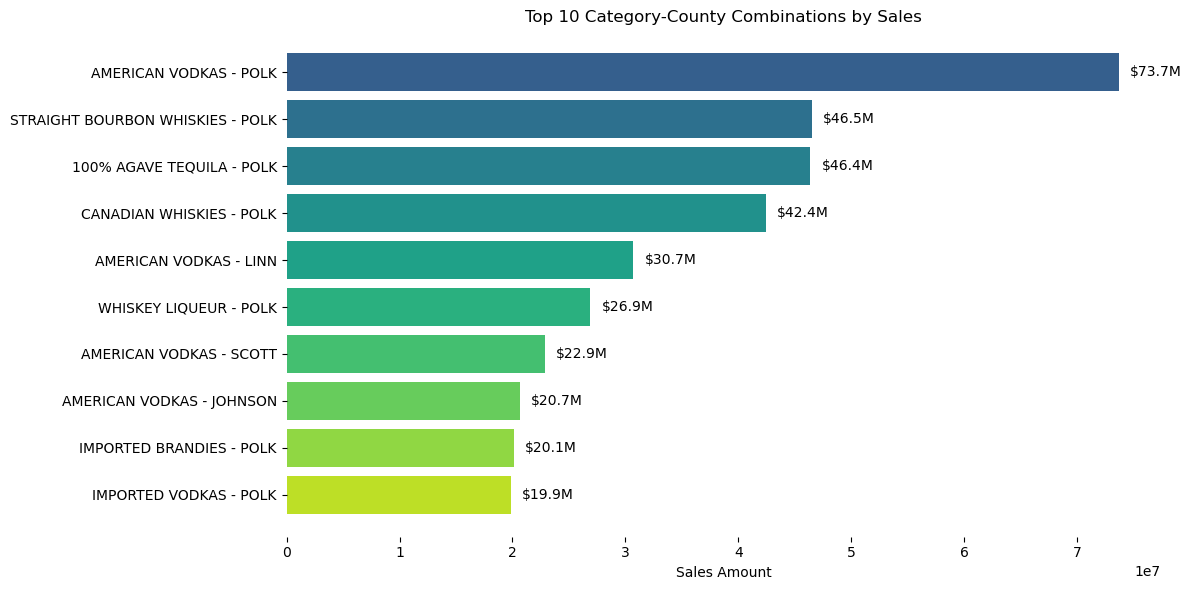

In [8]:
# Convert SQL result to DataFrame
df_top_sales = top_sales.DataFrame()

# Ensure it's numeric
df_top_sales['sale_amount'] = pd.to_numeric(df_top_sales['sale_amount'], errors='coerce')

# Sort and create label
df_top_sales = df_top_sales.sort_values(by='sale_amount', ascending=False)
df_top_sales['label'] = df_top_sales['category_name'] + ' - ' + df_top_sales['county']

# Create color map
colors = cm.viridis(np.linspace(0.3, 0.9, len(df_top_sales)))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(df_top_sales['label'], df_top_sales['sale_amount'], color=colors)

# Add labels
for bar in bars:
    plt.text(bar.get_width() + 1e6, bar.get_y() + bar.get_height()/2,
             f"${bar.get_width()/1e6:.1f}M", va='center')

# Clean up up the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Sales Amount')
plt.title('Top 10 Category-County Combinations by Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



To explore and analyze the data, I used SQL queries to examine alcohol sales by category and county. One key insight is shown in the chart titled “Top 10 Category-County Combinations by Sales”. This horizontal bar chart highlights the dominance of Polk County, which appears in 8 of the 10 top combinations.

I would expect Polk County to have the most sales because of its geographic location and the big cities inside it. However, the type of liquor will be unknown however I would conclude it could be a type of vodka

-The highest sales were for American Vodkas in Polk County, reaching $73.7 million.

-Straight Bourbon Whiskeys and 100% Agave Tequila in Polk also performed strongly, with sales of over $46 million each.

-Only a few top combinations came from other counties like Linn, Scott, and Johnson, and their sales were significantly lower.

These results match expectations because Polk County includes Des Moines, the largest city in Iowa, along with other major urban areas. This likely contributes to higher population density, more liquor stores, and greater consumer demand compared to other counties.

The visualization helps communicate these  trends, showing how geographic and product-specific factors interact to drive sales patterns. Advertisers can use this information to focus on these areas to increase profits

## Martin

## Which are the top perfoming stores by product and date

In [20]:
%%sql 
SELECT
    st.name, -- getting the name from store table
    p.im_desc AS product_name, -- getting the im_desc and changing the output to product_name
    SUM(s.sale_dollars) AS total_sales_dollars, -- getting the sum of sale_dollars and naming it total_sales-dollars
    sum(s.sale_liter) as total_sales_liter,-- getting the sum of sale liter and naming it total sales liter
    d.full_date -- getting the full_date from the date table
FROM sales_table As s -- giving sales table the alias s
LEFT JOIN product_table AS p ON s.product_key = p.product_key -- joining the product table to sales fact table on product key/ giving product table p alias
left join store_table as st on s.store_key= st.store_key -- joining the store table to sales fact table on store key/ giving the store table st alias
left join date_table as d on d.date_key= s.date_key -- joining the date table to sales table on date key/ giving date key d alias
GROUP BY
    p.im_desc, -- grouping by the im desc to get product name/ from product table
    st.name, -- grouping by the name from store table
    d.full_date --- grouping by date from date table
ORDER BY total_sales_dollars desc -- ordering by sales in descedning order
LIMIT 10; --- limiting to ten to get the top ten 

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

name,product_name,total_sales_dollars,total_sales_liter,full_date
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,261687.00,13252.50,2024-04-29
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,261687.00,13252.50,2025-01-27
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,260832.00,13200.00,2024-10-24
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,260832.00,13200.00,2024-07-18
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,260832.00,13200.00,2024-01-15
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,260832.00,13200.00,2023-10-30
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,251787.00,13252.50,2020-10-08
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,251388.24,13224.00,2021-04-19
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,250932.00,13200.00,2022-01-03
HY-VEE #3 / BDI / DES MOINES,TITOS HANDMADE VODKA,250932.00,13200.00,2021-07-05


In [21]:
%%sql top_sales_dollars <<
     -----saving the variable to be able to plot 
SELECT
    st.name, -- getting the name from store table
    p.im_desc AS product_name, -- getting the im_desc and changing the output to product_name
    SUM(s.sale_dollars) AS total_sales_dollars, -- getting the sum of sale_dollars and naming it total_sales-dollars
    sum(s.sale_liter) as total_sales_liter,-- getting the sum of sale liter and naming it total sales liter
    d.full_date -- getting the full_date from the date table
FROM sales_table As s -- giving sales table the alias s
LEFT JOIN product_table AS p ON s.product_key = p.product_key -- joining the product table to sales fact table on product key/ giving product table p alias
left join store_table as st on s.store_key= st.store_key -- joining the store table to sales fact table on store key/ giving the store table st alias
left join date_table as d on d.date_key= s.date_key -- joining the date table to sales table on date key/ giving date key d alias
GROUP BY
    p.im_desc, -- grouping by the im desc to get product name/ from product table
    st.name, -- grouping by the name from store table
    d.full_date --- grouping by date from date table
ORDER BY total_sales_dollars desc -- ordering by sales in descedning order
LIMIT 10; --- limiting to ten to get the top ten 

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

In [31]:
%%sql top_sales_liters <<
     -----saving the variable to be able to plot 
SELECT
    st.name, -- getting the name from store table
    p.im_desc AS product_name, -- getting the im_desc and changing the output to product_name
    SUM(s.sale_dollars) AS total_sales_dollars, -- getting the sum of sale_dollars and naming it total_sales-dollars
    sum(s.sale_liter) as total_sales_liters,-- getting the sum of sale liter and naming it total sales liter
    d.full_date -- getting the full_date from the date table
FROM sales_table As s -- giving sales table the alias s
LEFT JOIN product_table AS p ON s.product_key = p.product_key -- joining the product table to sales fact table on product key/ giving product table p alias
left join store_table as st on s.store_key= st.store_key -- joining the store table to sales fact table on store key/ giving the store table st alias
left join date_table as d on d.date_key= s.date_key -- joining the date table to sales table on date key/ giving date key d alias
GROUP BY
    p.im_desc, -- grouping by the im desc to get product name/ from product table
    st.name, -- grouping by the name from store table
    d.full_date --- grouping by date from date table
ORDER BY total_sales_dollars desc -- ordering by sales in descedning order
LIMIT 10; --- limiting to ten to get the top ten 

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

## Plotting the bar graph

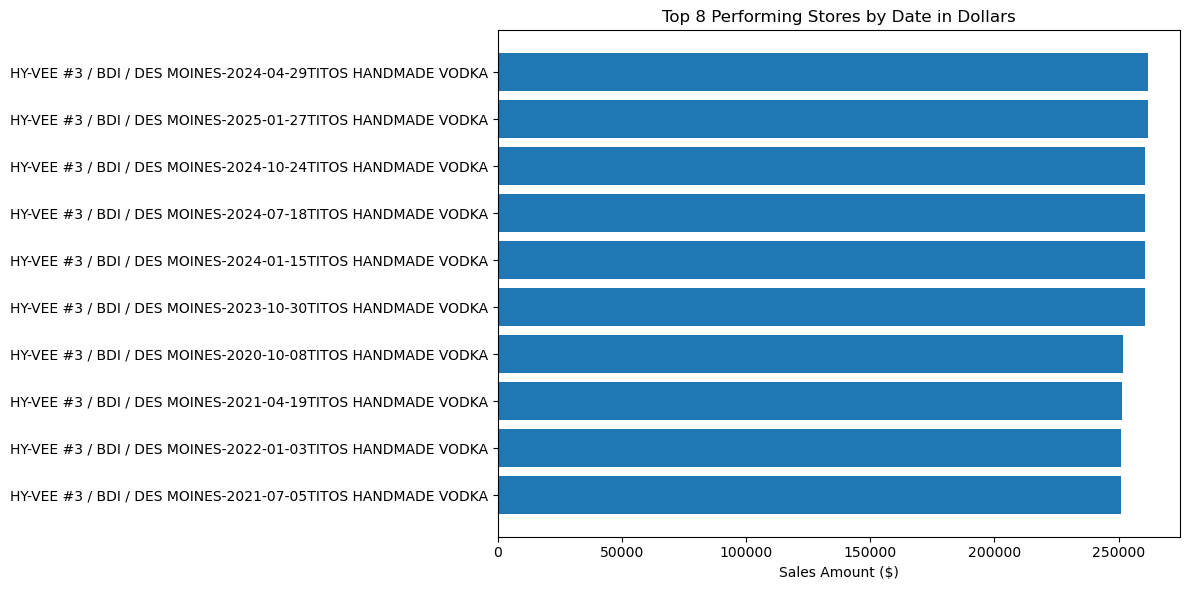

In [24]:
# CODE FOR BAR CHART
# Convert SQL result to DataFrame
df_top_sales_usd = top_sales_dollars.DataFrame()

# Fix: make sure the correct column names are used
# Example column names: 'product_name', 'total_sales_dollars', 'date_key'

# Create label: product name + date
df_top_sales_usd['label'] = df_top_sales_usd['name'] + '-' + df_top_sales_usd['full_date'].astype(str) + df_top_sales_usd['product_name']

# Plot
plt.figure(figsize=(12, 6))
plt.barh(df_top_sales_usd['label'], df_top_sales_usd['total_sales_dollars'])
plt.xlabel('Sales Amount ($)')
plt.title('Top 10 Performing Stores by Date in Dollars')
plt.gca().invert_yaxis()  # Highest sales at the top
plt.tight_layout()
plt.show()

## Plotting the pie chart for sales

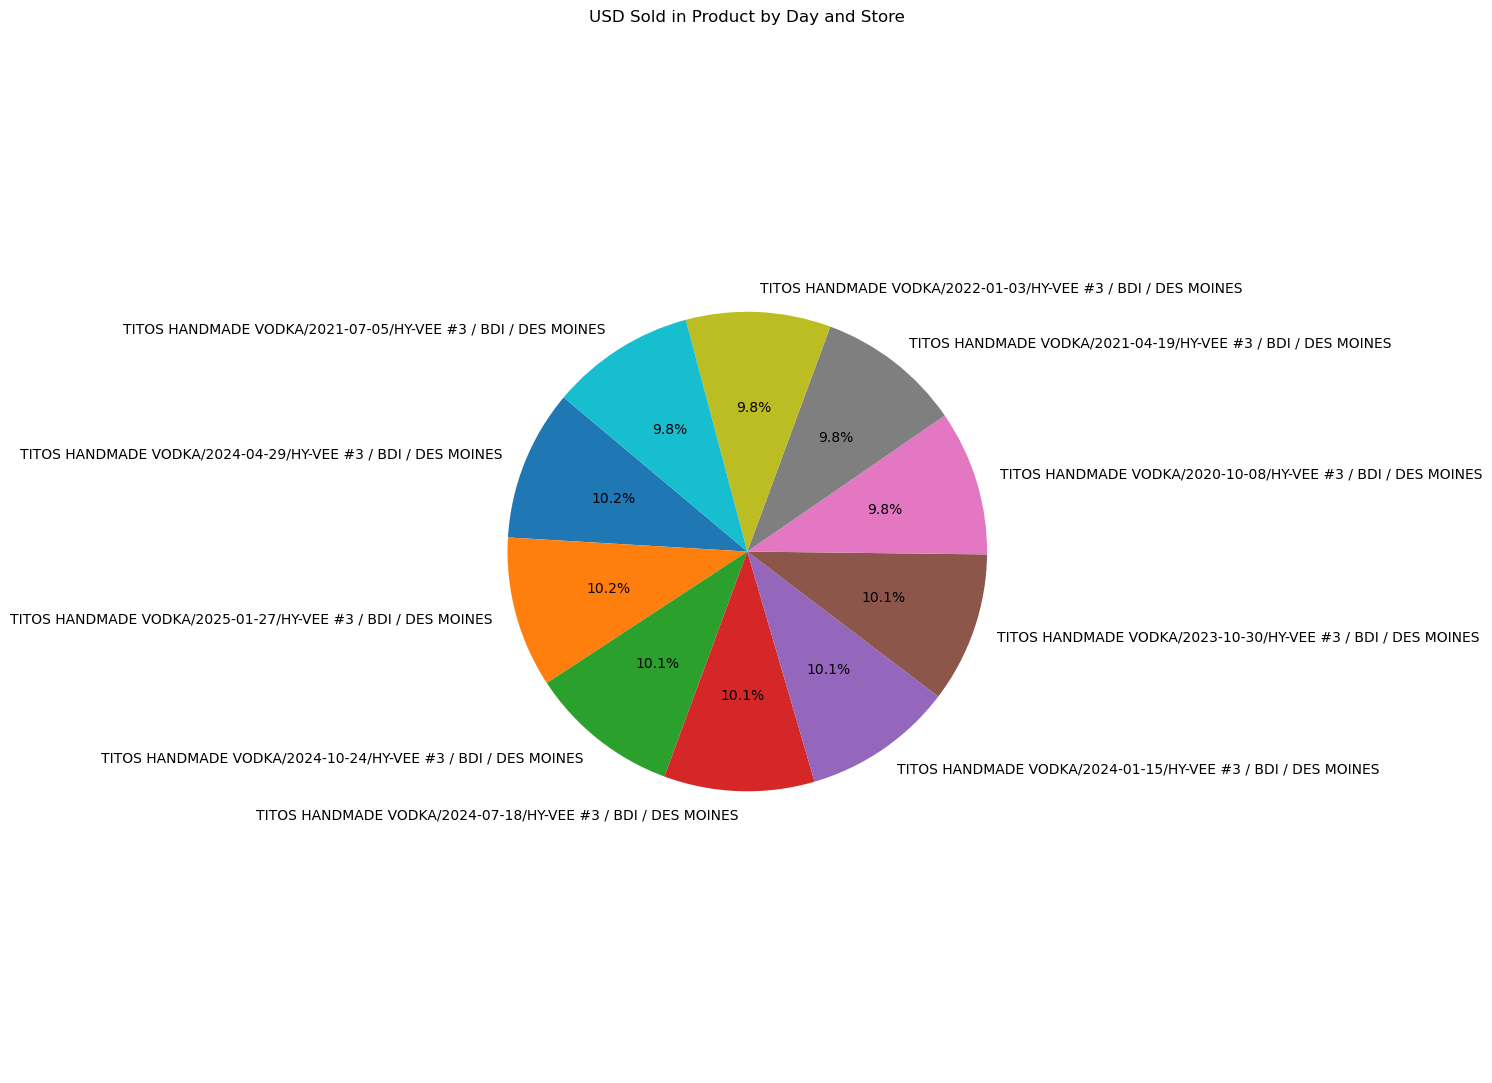

Total Sales from invoices ($): 2571741.24


In [25]:
 #Pie Chart USD (PASTE AFTER USD BAR CHART)

df_top_sales_usd['label'] = df_top_sales_usd['product_name'] + '/' + df_top_sales_usd['full_date'].astype(str) + '/' + df_top_sales_usd['name']

# Now plot a pie chart
plt.figure(figsize=(14,11))
plt.pie(
    df_top_sales_usd['total_sales_dollars'], 
    labels=df_top_sales_usd['label'],
    autopct='%1.1f%%',  # shows percentages
    startangle=140      # rotate start point for better layout
)
plt.title('USD Sold in Product by Day and Store')
plt.axis('equal')  # make the pie a perfect circle
plt.tight_layout()
plt.show()
print('Total Sales from invoices ($):', sum(df_top_sales_usd['total_sales_dollars'].astype(float)))

## Plotting the total liters and sales

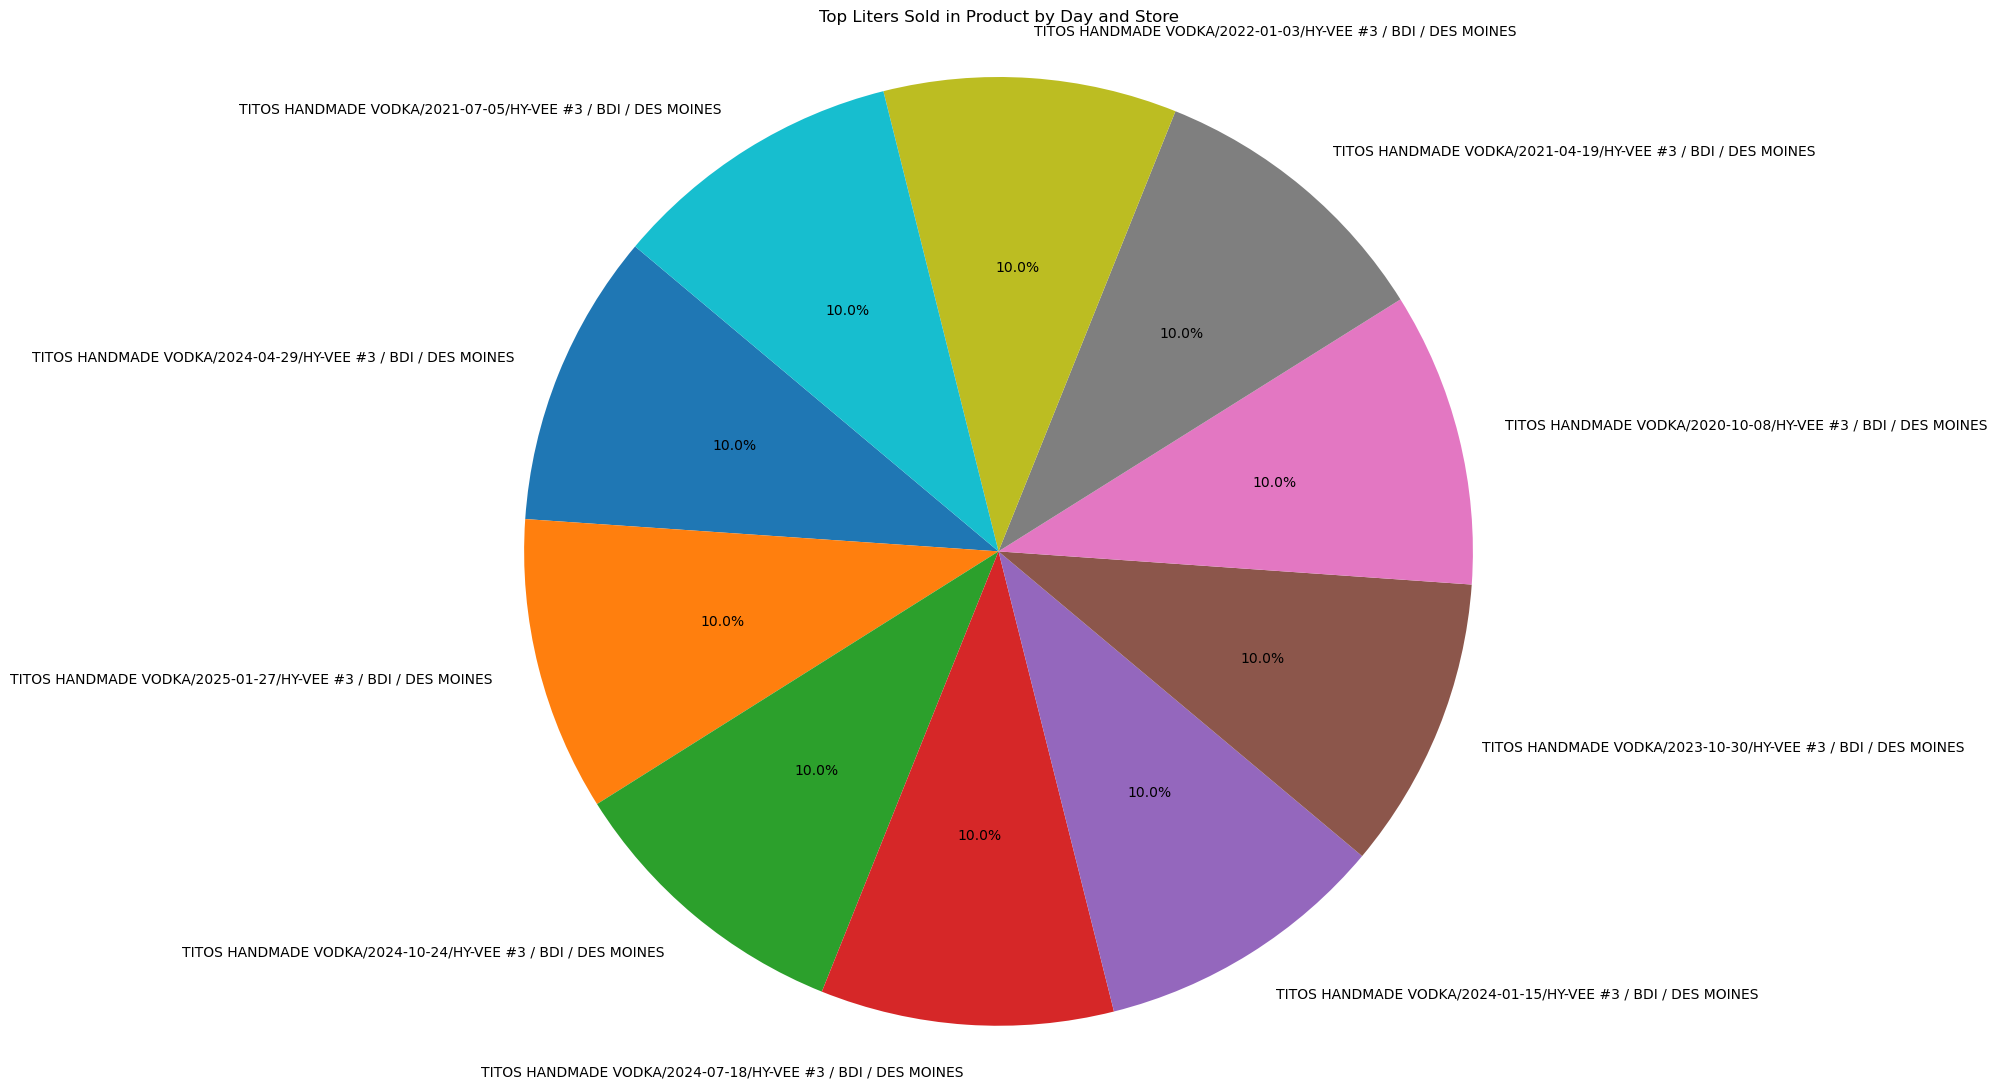

Total Sales from invoices (Liters): 132181.5


In [37]:
# Pie Chart Liters (PASTE AFTER LITERS BAR CHART)
df_top_sales_liters = top_sales_liters.DataFrame()
df_top_sales_liters['label'] = df_top_sales_liters['product_name'] + '/' + df_top_sales_liters['full_date'].astype(str) + '/' + df_top_sales_liters['name']

# Now plot a pie chart
plt.figure(figsize=(18,11))
plt.pie(
    df_top_sales_liters['total_sales_liters'], 
    labels=df_top_sales_liters['label'],
    autopct='%1.1f%%',  # shows percentages
    startangle=140      # rotate start point for better layout
)
plt.title('Top Liters Sold in Product by Day and Store')
plt.axis('equal')  # make the pie a perfect circle
plt.tight_layout()
plt.show()
print('Total Sales from invoices (Liters):',sum(df_top_sales_liters['total_sales_liters'].astype(float)))

# Question: Which are the top performing stores by product and date?
## Importance of business question:
Allows us to identify the stores which purchase the most Quantity (Liters) and Amount ($) by product and date.

## Expected:
Stores acquire different products based on their popularity within their own sales. It is also expected for stores to place orders on different dates depending on their supply and demand, stock levels, and storage room.

It is also expected that stores purchase different volumes depending on the scale of their business. Small-business buy small batches, big business buy big batches.

## Results:
Certain stores aqcuire much more product and in different dates. Meaning that these stores outperform product purchases. We can also see that the HY-VEE #3 BDI DES MOINES Liquor Store purchases lots of Titos Vodka. 

The top purchases by liters has been a total of 132,181.5 Liters of Titos Handmade Vodka.
This has been done by 10 purchases from the HY-VEE #3 store.


The same store also accounts for the 10 biggest purchases. It can also be noted that as the year increases the sale amount in liters increases (excluding 2020, which was the Pandemic and alcohol sales and consumption were extraordinary). 

Another key finding, is that the top 10 purchases totaled a sum of $2,571,741.24. Similarilly to sales in liters, the sale amount (in USD) tends to increase as the year increases.

## Conclusion: 

Tito's Handmade Vodka tends to be the Product with the largest sale numbers, especially in store HY-VEE # 3.


## Reccommendations:

We strongly encourage a bulk deal discount with the HY-VEE store as they tend purchase a lump sum of liters, consequently a large amount of USD, in Titos Handmade Vodka. By giving a discount on bulk, we can encourage the HY-VEE store to increase the amount of liters therefore increasing our sale numbers.

# Jake

## What are the top 3 selling categories on each day of the week?

In [34]:
%%sql 
SELECT day_of_the_week, category_name, total_sales -- select day of the week, category name, and the total sales of that category on that day as final outputs
FROM (
  SELECT d.day_of_the_week, p.category_name, SUM(s.sale_dollars) AS total_sales,
    RANK() OVER ( -- Create a ranking of categories per day based on sales
      PARTITION BY d.day_of_the_week -- Restart rank for each day
      ORDER BY SUM(s.sale_dollars) DESC -- get top total sales rank descending
    ) AS rank
  FROM sales_table s -- Use the sales table
  JOIN date_table d ON s.date_key = d.date_key -- join with date table to get day names
  JOIN product_table p ON s.product_key = p.product_key -- Join with product table to get categories
  GROUP BY d.day_of_the_week, p.category_name -- Group by both day and category
) AS ranked
WHERE rank <= 3 -- filter top 3 categories per day
ORDER BY -- Order days in calendar order using a custom sort to avoid alphabetic ordering which is the default
  CASE
    WHEN day_of_the_week = 'Sunday' THEN 1
    WHEN day_of_the_week = 'Monday' THEN 2
    WHEN day_of_the_week = 'Tuesday' THEN 3
    WHEN day_of_the_week = 'Wednesday' THEN 4
    WHEN day_of_the_week = 'Thursday' THEN 5
    WHEN day_of_the_week = 'Friday' THEN 6
    WHEN day_of_the_week = 'Saturday' THEN 7
  END,
  rank;  -- sort by rank within each day

Running query in 'postgresql://student@/edassignment_final'

21 rows affected.

day_of_the_week,category_name,total_sales
Sunday,AMERICAN VODKAS,3671493.45
Sunday,CANADIAN WHISKIES,3005065.78
Sunday,100% AGAVE TEQUILA,1992598.68
Monday,AMERICAN VODKAS,64039249.20
Monday,CANADIAN WHISKIES,41076265.00
Monday,STRAIGHT BOURBON WHISKIES,34413736.73
Tuesday,AMERICAN VODKAS,66445756.95
Tuesday,CANADIAN WHISKIES,55316417.47
Tuesday,STRAIGHT BOURBON WHISKIES,39151257.37
Wednesday,AMERICAN VODKAS,68745048.71


In [22]:
%%sql result_day_category <<
-- Store result in variable result_day_category
SELECT day_of_the_week, category_name, total_sales -- select day of the week, category name, and the total sales of that category on that day as final outputs
FROM (
  SELECT d.day_of_the_week, p.category_name, SUM(s.sale_dollars) AS total_sales,
    RANK() OVER ( -- Create a ranking of categories per day based on sales
      PARTITION BY d.day_of_the_week -- Restart rank for each day
      ORDER BY SUM(s.sale_dollars) DESC -- get top total sales rank descending
    ) AS rank
  FROM sales_table s -- Use the sales table
  JOIN date_table d ON s.date_key = d.date_key -- join with date table to get day names
  JOIN product_table p ON s.product_key = p.product_key -- Join with product table to get categories
  GROUP BY d.day_of_the_week, p.category_name -- Group by both day and category
) AS ranked
WHERE rank <= 3 -- filter top 3 categories per day
ORDER BY -- Order days in calendar order using a custom sort to avoid alphabetic ordering which is the default
  CASE
    WHEN day_of_the_week = 'Sunday' THEN 1
    WHEN day_of_the_week = 'Monday' THEN 2
    WHEN day_of_the_week = 'Tuesday' THEN 3
    WHEN day_of_the_week = 'Wednesday' THEN 4
    WHEN day_of_the_week = 'Thursday' THEN 5
    WHEN day_of_the_week = 'Friday' THEN 6
    WHEN day_of_the_week = 'Saturday' THEN 7
  END,
  rank;  -- sort by rank within each day

Running query in 'postgresql://student@/edassignment_final'

21 rows affected.

## Graphing the Plot

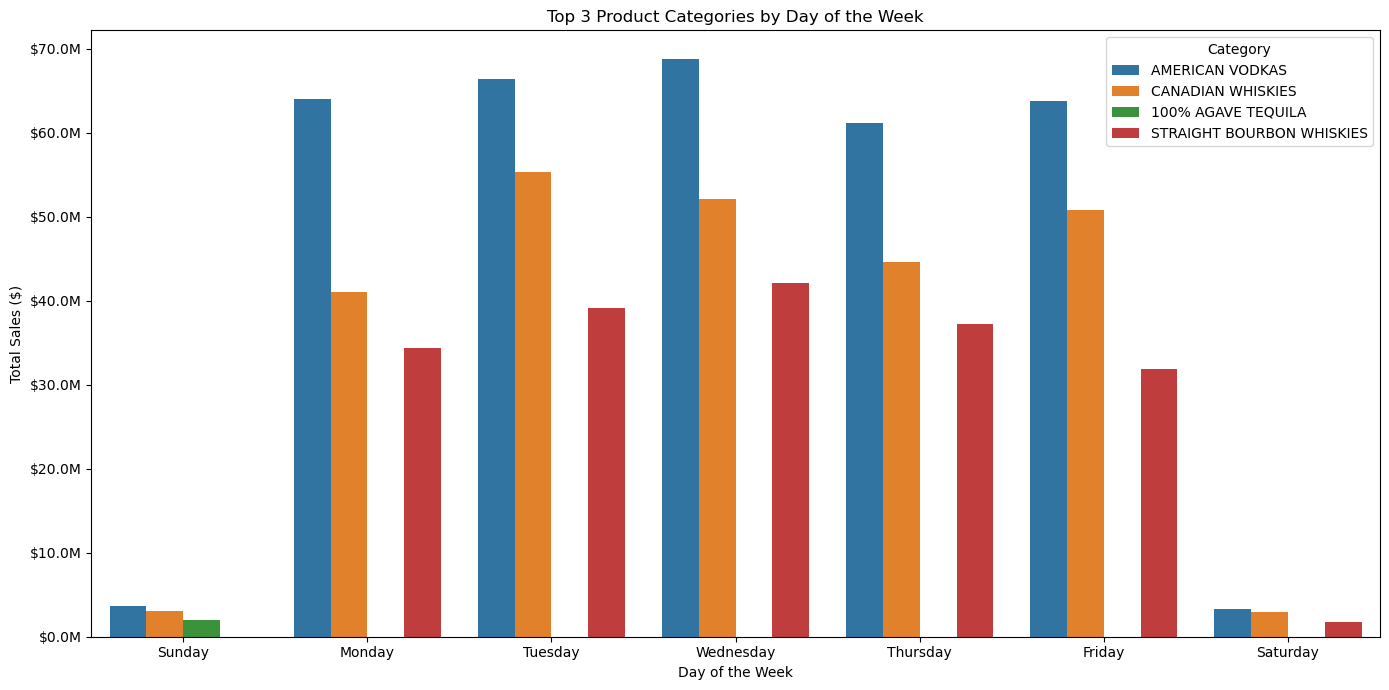

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#convert the SQL result into dataframe
df_day_category = result_day_category.DataFrame()

plt.figure(figsize=(14, 7))

#create a grouped bar chart of day of the week on the x-axis, total sales on the y-axis, bars grouped by category
sns.barplot(data=df_day_category, x='day_of_the_week', y='total_sales', hue='category_name')

plt.title('Top 3 Product Categories by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')

#format y-axis labels to display in millions
formatter = ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

#legend for product categories
plt.legend(title='Category')
plt.tight_layout()
plt.show()



This question is particularly useful for advertisers and liquor stores because reveals purchasing patterns of liquor stores from the Iowa government. This information helps stores plan their inventory, anticipate customer demand, and time promotions effectively, while also helping advertisers target their campaigns based on when stores are most likely to stock certain products.

We expect to see a variation in what liquor is sold to liquor stores throughout the week, with fewer sales in general on weekends when many liquor stores close.

Our analysis showed that there was very little variation of what different liquor was sold throughout the week. American Vodkas, Canadian Whiskies, and Straight Bourbon Whiskies consistently ranked as the top-selling categories throughout the week, except on Sundays. On Sundays, 100% Agave Tequila replaced bourbon in the top three, suggesting a shift in consumer purchasing. As predicted, total sales were significantly higher on weekdays, showing that liquor stores primarily place large restocking orders during the workweek when most of them are open.

We recommend that liquor stores should prepare their shelves with vodka, Canadian whisky, and bourbon early in the week to match bulk purchasing behavior. What liquor stores buy is usually a reflection of customer demand, so it is best to stock well in advance in the week, (Monday or Tuesday), so to meet demand throughout the week. Also, since tequila appears more prominently on Sundays, advertisers can tailor weekend promotions around it.

## Izaz

### What are the top preforming products in 2024?

### Expectation: I expect to see whiskey in the top 10 products and category since it is the most popular liquor in the US. Also, products that are us based and closer to the US will have more sales than imported ones.

In [62]:
%%sql 
SELECT
    d.year,-- choosing year from date table
    p.im_desc AS product_description, -- choosing the im_desc from product table and naming it product_description
    SUM(s.sale_dollars) AS total_sales -- sum of all sales from sales fact table
FROM
    sales_table s  ---naming the sales_table s
JOIN
    product_table p ON s.product_key = p.product_key --- joining the product table to sales table on the product key 
JOIN
    date_table d ON s.date_key = d.date_key --- joining the date table to sales table on the date key
WHERE
    d.year = '2024' -- specifying we want the year to be 2024
GROUP BY
    d.year, p.im_desc -- grouping by year and product description 
ORDER BY
    total_sales DESC -- want it in descending order
LIMIT 10; -- want the top ten instances

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

year,product_description,total_sales
2024,TITOS HANDMADE VODKA,30750516.12
2024,BLACK VELVET,11718925.82
2024,FIREBALL CINNAMON WHISKEY,10895231.00
2024,CROWN ROYAL,9605163.84
2024,CROWN ROYAL REGAL APPLE,9407693.64
2024,JACK DANIELS OLD #7 BLACK LABEL,9261105.57
2024,CAPTAIN MORGAN ORIGINAL SPICED,8388730.00
2024,CAPTAIN MORGAN ORIGINAL SPICED BARREL,7137291.04
2024,JAMESON,6721177.24
2024,CROWN ROYAL BLACKBERRY,6474300.16


In [63]:
%%sql result_products <<
SELECT
    d.year,-- choosing year from date table
    p.im_desc AS product_description, -- choosing the im_desc from product table and naming it product_description
    SUM(s.sale_dollars) AS total_sales -- sum of all sales from sales fact table
FROM
    sales_table s  ---naming the sales_table s
JOIN
    product_table p ON s.product_key = p.product_key --- joining the product table to sales table on the product key 
JOIN
    date_table d ON s.date_key = d.date_key --- joining the date table to sales table on the date key
WHERE
    d.year = '2024' -- specifying we want the year to be 2024
GROUP BY
    d.year, p.im_desc -- grouping by year and product description 
ORDER BY
    total_sales DESC -- want it in descending order
LIMIT 10; -- want the top ten instances

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

### Plotting Graph

/tmp/ipykernel_1799/1169836944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_products, x='total_sales', y='product_description', palette='crest')


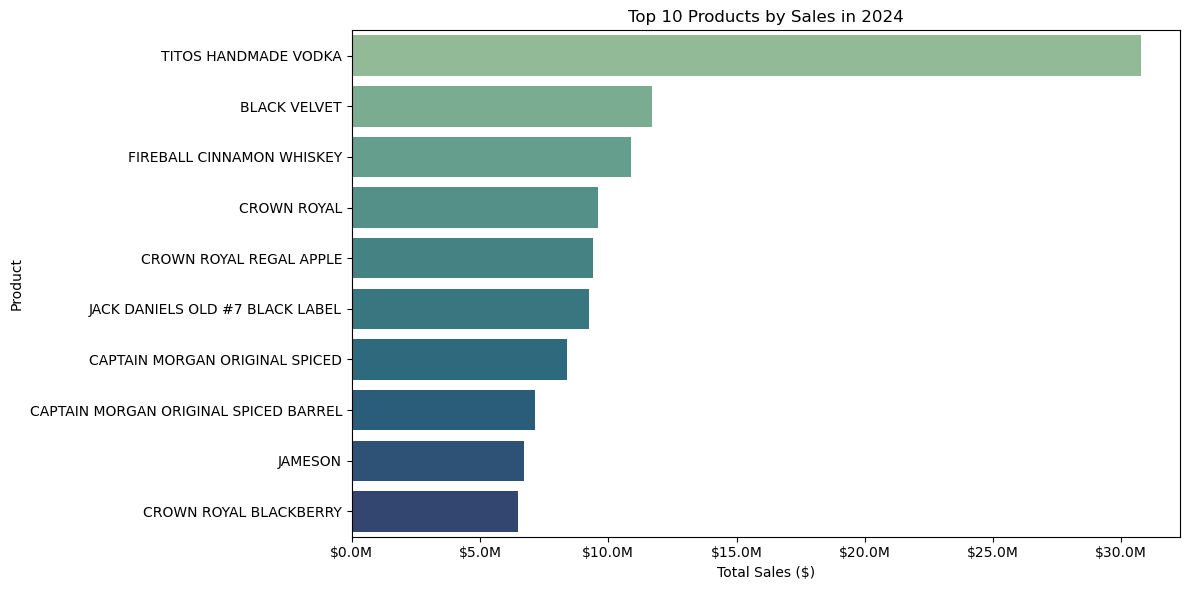

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df_products = result_products.DataFrame() # putting in data frame

plt.figure(figsize=(12, 6)) # specifing the size
sns.barplot(data=df_products, x='total_sales', y='product_description', palette='crest') #assigning x and y from which columns
plt.title('Top 10 Products by Sales in 2024')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')

formatter = ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Top 10 Products by sales in 2024:

Findings:
Titos Handmade vodka is significantly ahead of the other products in terms of sales. this product has more than 30 million sale dollars, whereas the second product only has 11 million dollars.
Another important insight is that majority of the products in top 10 are whiskey products (7 out of 10, including black velvet, fireball, crown royal, jack daniels, and jameson).
These results align with my expectations for the most part. I expected to see a a lot of whiskey products since whiskey is the most popular liquor in the US. One thing that I was surprised about was how Tito's Handmade vodka had significantly more sales than other products.

## What are the top ten categories sold in 2024?

In [65]:
%%sql 
SELECT
    d.year, -- choosing year from date table
    p.category_name AS category,  -- choosing the category_name and naming it category 
    SUM(s.sale_dollars) AS total_sales -- sum of all sales from sales fact table
FROM
    sales_table s ---naming the sales_table s
JOIN
    product_table p ON s.product_key = p.product_key --- joining the product table to sales table on the product key 
JOIN
    date_table d ON s.date_key = d.date_key --- joining the date table to sales table on the date key
WHERE
    d.year = '2024' -- specifying we want the year to be 2024
GROUP BY
    d.year, p.category_name -- grouping by year and product description 
ORDER BY
    total_sales DESC -- want it in descending order
LIMIT 10; -- want the top ten instances

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

year,category,total_sales
2024,AMERICAN VODKAS,67063063.21
2024,CANADIAN WHISKIES,49826631.32
2024,STRAIGHT BOURBON WHISKIES,40275195.32
2024,100% AGAVE TEQUILA,34620858.60
2024,WHISKEY LIQUEUR,26517447.81
2024,SPICED RUM,22198681.63
2024,TENNESSEE WHISKIES,16889224.49
2024,TEMPORARY & SPECIALTY PACKAGES,16371280.32
2024,IMPORTED CORDIALS & LIQUEURS,12000394.95
2024,IMPORTED VODKAS,11898254.09


In [66]:
%%sql result_categories <<
-- naming the query to python so we can plot 
SELECT
    d.year, -- choosing year from date table
    p.category_name AS category,  -- choosing the category_name and naming it category 
    SUM(s.sale_dollars) AS total_sales -- sum of all sales from sales fact table
FROM
    sales_table s ---naming the sales_table s
JOIN
    product_table p ON s.product_key = p.product_key --- joining the product table to sales table on the product key 
JOIN
    date_table d ON s.date_key = d.date_key --- joining the date table to sales table on the date key
WHERE
    d.year = '2024' -- specifying we want the year to be 2024
GROUP BY
    d.year, p.category_name -- grouping by year and product description 
ORDER BY
    total_sales DESC -- want it in descending order
LIMIT 10; -- want the top ten instances

Running query in 'postgresql://student@/edassignment_final'

10 rows affected.

/tmp/ipykernel_1799/457216636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_categories, x='total_sales', y='category', palette='flare') # specifing x and y with columsn total sales and category


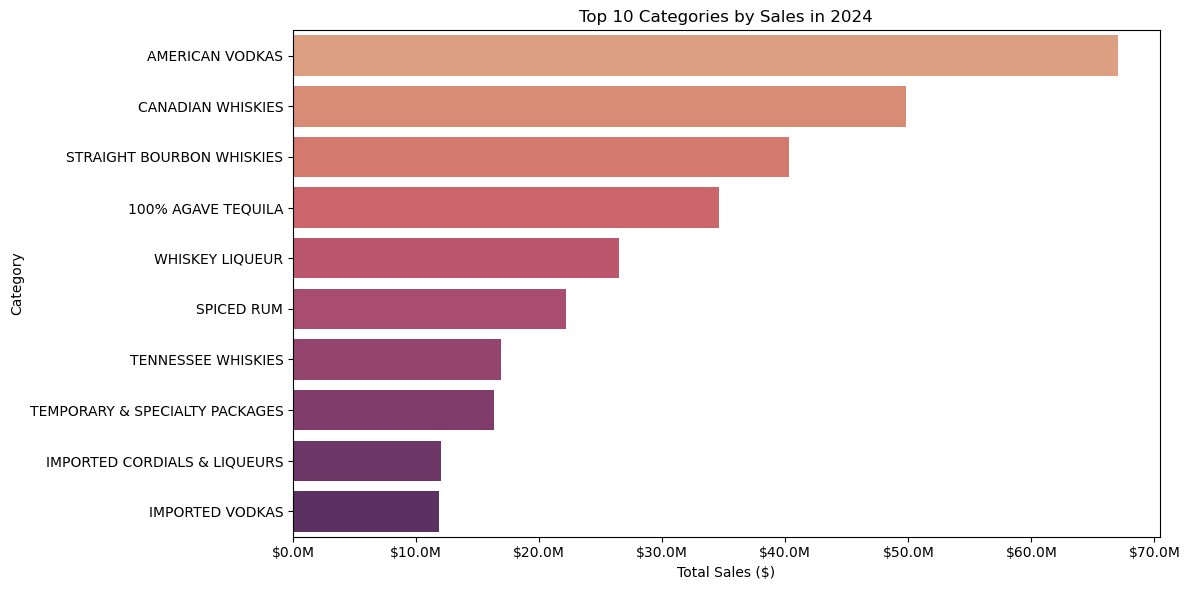

In [67]:
df_categories = result_categories.DataFrame()

plt.figure(figsize=(12, 6)) # specifing size
sns.barplot(data=df_categories, x='total_sales', y='category', palette='flare') # specifing x and y with columsn total sales and category
plt.title('Top 10 Categories by Sales in 2024')
plt.xlabel('Total Sales ($)')
plt.ylabel('Category')

formatter = ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Top 10 Categories by sales in 2024:

Findings:
Based on the top performing products, it makes sense that American vodka is the top performing category because Tito's Handmade Vodka dominated sales.
Most of the top categories are whiskies, which is consistent with the top performing products. This confirms whisky's broad appeal.
Temporary and specialty packages suggest that limited-edition or holiday items generate a lot of revenue.
The results align with my expectations, since the top products and categories They are mostly from the US and Canada. I also expected to see vodka and whiskey categories as some of the top categories. Another expectation that this anlaysis meets is that I expected seasonal, holiday, or limited edition items to be up there since they generate a lot of revenue.

These insights will help Alcohol Beverage Division come up with Targeted Advertisement where Advertisers can promote best-selling products to liquor stores or focus campaigns on trending categories to increase profits. It can help with Inventory Optimization using this information by allowing the Alcohol Beverage Division to forecast demand more accurately and ensure that top-selling products are available for liquor stores.